In [7]:
import numpy as np
import matplotlib.pyplot as plt

print("Packages Imported")

Packages Imported


In [24]:
def plot_func(f, window, res=10000, title=None):
    t = np.linspace(window[0], window[1], res)
    y = f(t)
    plt.plot(t, y, color="purple")
    plt.grid(True)
    
    if title is not None:
        plt.title(title)

In [198]:
def cos_transform(c):
    return lambda x: np.cos(c*2*np.pi*x)

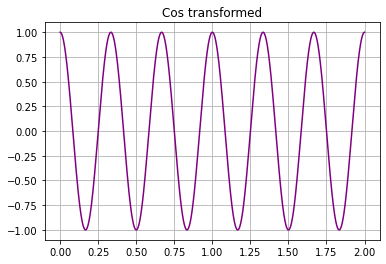

In [199]:
plot_func(cos_transform(3), (0, 2), title="Cos transformed")

In [170]:
def riemann_sum(f, limits, N=100000):
    t_values = np.linspace(limits[0], limits[1], N)
    integral_approx = np.sum(f(t_values))*(limits[1]-limits[0])/N
    return integral_approx

In [ ]:
def tan_inv(a, b):
    if a < 0:
        return np.pi + np.arctan(b/a)
    else:
        return np.arctan(b/a)

In [153]:
def plot_euler(imag_f, limits, res=10000):

    t = np.linspace(limits[0], limits[1], res)
    vec = imag_f(t)

    a = np.real(vec)
    b = np.imag(vec)

    theta = [tan_inv(a[i], b[i]) for i in range(len(a))]
    r = np.sqrt(a**2 + b**2)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r, color="magenta")
    # ax.set_rticks([0.25, 0.5, 1])  # Less radial ticks
    ax.grid(True)

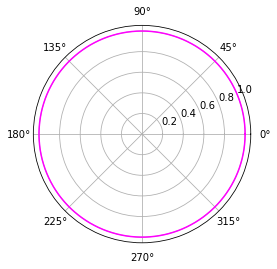

In [154]:
# a look into euler's formula
f = lambda t: np.e**(t*1j)

plot_euler(f, (0, 2*np.pi))

In [121]:
# fourier transform formula
def fourier_func(sig_f, freq):
    return lambda t: sig_f(t)*np.e**-(1j*2*np.pi*freq*t)

C:\Users\soysa\AppData\Local\Temp\ipykernel_19344\2502669979.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.arctan(b/a)


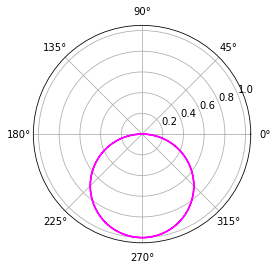

In [156]:
f = fourier_func(np.sin, 1/(2*np.pi))

plot_euler(f, (0, 2*np.pi))

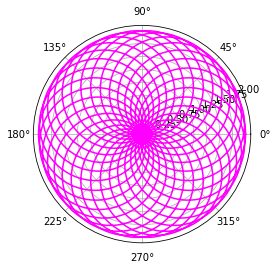

In [160]:
f = fourier_func(cos_transform(3), 2.3)

plot_euler(f, (0, 10))

In [193]:
# finding center of mass 

In [266]:
def plot_transform(sig_f, limits=(0,5), res=500):
    freqs = np.linspace(limits[0], limits[1], res)
    power = [np.real(riemann_sum(fourier_func(sig_f, freq), (0, 5))) for freq in freqs]
    
    plt.plot(freqs, power, color="lime")
    plt.grid(True)
    
    return find_peaks(freqs, np.array(power))

[4.04809619238477]

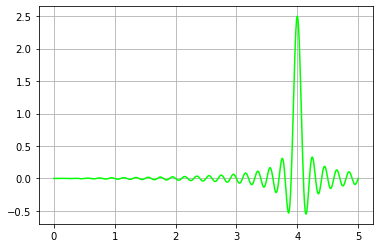

In [267]:
plot_transform(cos_transform(4))

In [268]:
def create_multi_freq_func(freqs):
    return lambda t: sum([cos_transform(freq)(t) for freq in freqs])

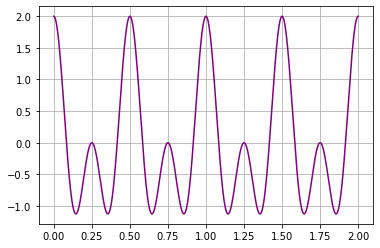

In [269]:
sig_f = create_multi_freq_func([2, 4])

plot_func(sig_f, (0, 2))

[2.0440881763527052, 3.0460921843687374]

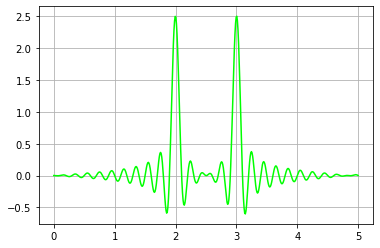

In [274]:
plot_transform(sig_f)

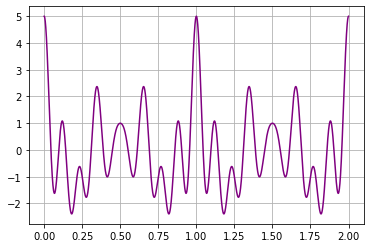

In [275]:
sig_f = create_multi_freq_func([2,3,6,8,9])

plot_func(sig_f, (0, 2))

[2.024, 3.026, 6.032, 8.036, 9.038]

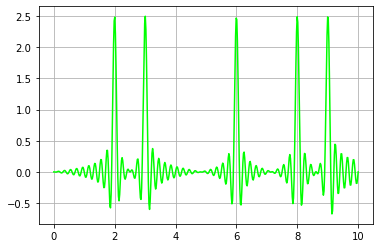

In [278]:
plot_transform(sig_f, limits=(0, 10))

In [277]:
# identifying peaks
def find_peaks(freqs, power):
    threshold = max(power)/2
    peak_mask = np.append(np.diff(power>threshold), False)
    peak_indices = np.arange(0, len(power))[peak_mask]
    i = 0
    peak_vals = []
    while i < len(peak_indices):
        peak_vals.append(np.round(max(freqs[peak_indices[i]:peak_indices[i+1]]), 3))
        i += 2
    return peak_vals